In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [7]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


Text(0, 0.5, 'inertia')

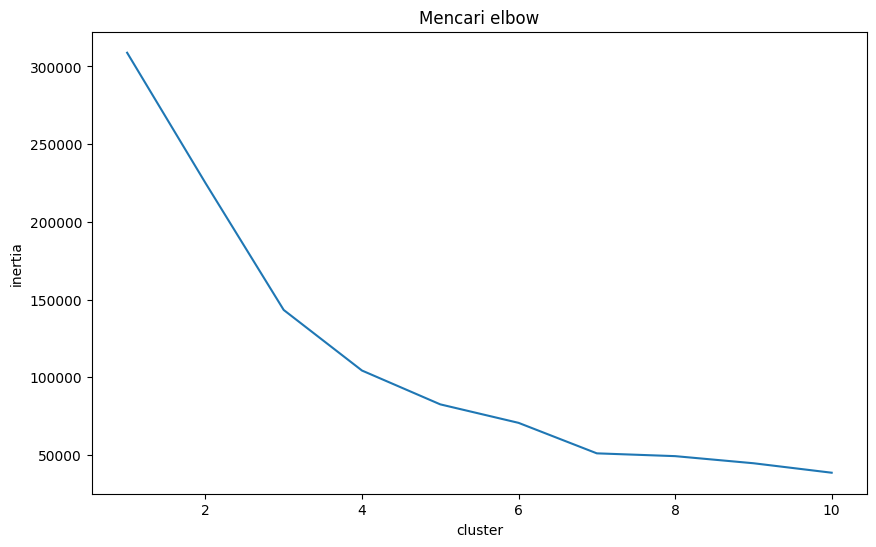

In [8]:
cluster = []

for i in range(1,11):
    km = KMeans(n_clusters = i).fit(X)
    cluster.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=list(range(1,11)), y=cluster, ax=ax)
ax.set_title('Mencari elbow')
ax.set_xlabel('cluster')
ax.set_ylabel('inertia')

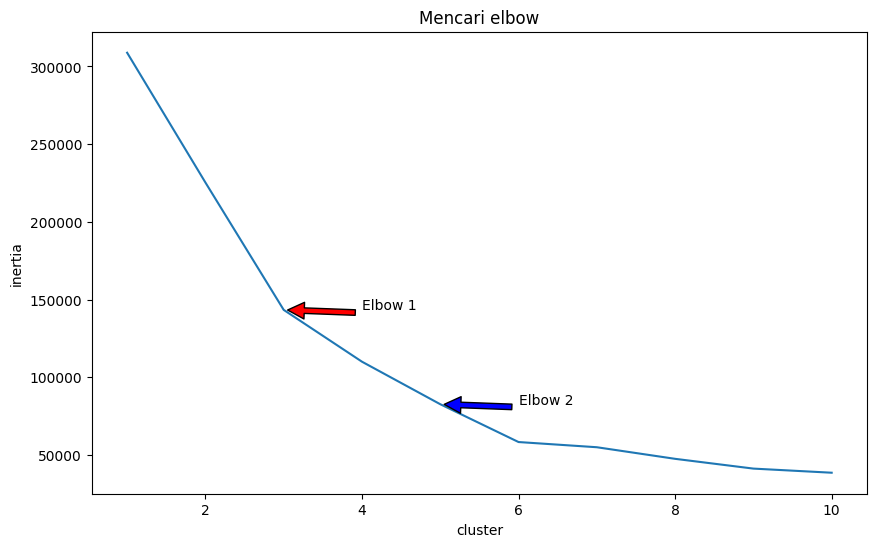

In [9]:
cluster = []

for i in range(1,11):
    km = KMeans(n_clusters = i).fit(X)
    cluster.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=list(range(1,11)), y=cluster, ax=ax)
ax.set_title('Mencari elbow')
ax.set_xlabel('cluster')
ax.set_ylabel('inertia')

# Menambahkan panah untuk elbow pertama
elbow_point1 = 3  # Ganti dengan nilai elbow yang sesuai
elbow_value1 = cluster[elbow_point1-1]
ax.annotate('Elbow 1', xy=(elbow_point1, elbow_value1), xytext=(elbow_point1+1, elbow_value1+50),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Menambahkan panah untuk elbow kedua
elbow_point2 = 5  # Ganti dengan nilai elbow yang sesuai
elbow_value2 = cluster[elbow_point2-1]
ax.annotate('Elbow 2', xy=(elbow_point2, elbow_value2), xytext=(elbow_point2+1, elbow_value2+50),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

In [10]:
n_clus = 4
kmean = KMeans(n_clusters = n_clus).fit(X)
X['cluster'] = kmean.labels_


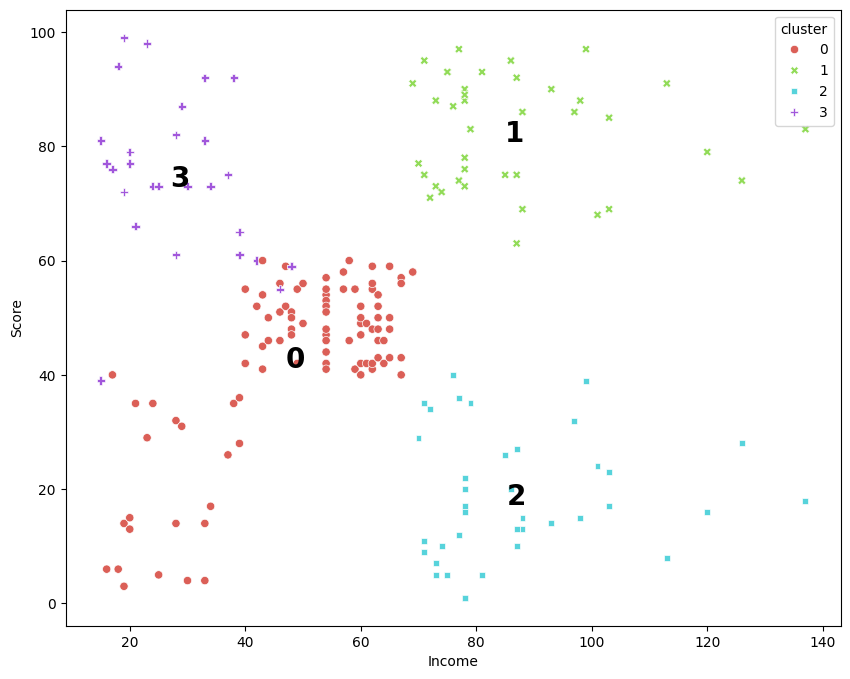

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=X, x='Income', y='Score', hue='cluster', style='cluster', sizes=(100, 200), palette=sns.color_palette('hls', n_clus))

for label in X['cluster'].unique():
    plt.annotate(label, (X[X['cluster'] == label]['Income'].mean(),
                 X[X['cluster'] == label]['Score'].mean()),
                 horizontalalignment = 'center',
                 verticalalignment = 'center',
                 size = 20, weight= 'bold', color='black')




In [12]:
print(X)

     Age  Income  Score  cluster
0     19      15     39        3
1     21      15     81        3
2     20      16      6        0
3     23      16     77        3
4     31      17     40        0
..   ...     ...    ...      ...
195   35     120     79        1
196   45     126     28        2
197   32     126     74        1
198   32     137     18        2
199   30     137     83        1

[200 rows x 4 columns]


In [13]:
print(X)

     Age  Income  Score  cluster
0     19      15     39        3
1     21      15     81        3
2     20      16      6        0
3     23      16     77        3
4     31      17     40        0
..   ...     ...    ...      ...
195   35     120     79        1
196   45     126     28        2
197   32     126     74        1
198   32     137     18        2
199   30     137     83        1

[200 rows x 4 columns]


In [14]:
import openpyxl
X.to_excel("Output.xlsx", index=False)
